<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_Kyriaki_5_(paper)_G2Net_EfficientnetB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'g2net-gravitational-wave-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F23249%2F2399555%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T140059Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3f070cca9f821bc1b07a648298dd066723b6d03ecc7b3c2a2835a862d4777132197e42f03afef94514ce67beeb7fc994fca2654603d04dbf7abe9875e319afae353790e3e6d28b6751df3ea7c5afad8668e424092f68cf427f276af525764dc7de039342cd52364904c215d42d605b638cb6ac131c7d4bee14cb9288661fb6ed53f972331bb9575e1b2a12fe1c29a44beb2e2991c91b9e4b001660255ac2d4c71df868b5d1042f096f80ab8230d82ad0297424bbdc1a0fa7e99f8485d1b59ca0368d6e0101ae78771616c6b147f79cdd5fd23b888df2f6c50f5495a87408d70f0362f914994fcd02adafe69a22f7e18094290e3e4ac6da71933a37ccd979de2d,g2net-n-mels-128-test-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1442546%2F2386402%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T140059Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D62866705b9f27679fdcb7a284988a8d8554c7161c9f2be58c0cda9cbdabe0cb4b88b1730bcad14a829e1f7a7aa6916bb07154baa0951be4b2732363b42cb1bb85d47c28590a16a365124ff7ddeaa99db0f840fca020e10b45ad5e0ed27ee9edd41ffc6e09920507747ef9869598a33e063e578f960b0f88d9008c8a61ca7bcabe7f5d5d204699cd91728f9752a9bf5e724f30bbec82a9a2cc99e25ac2b1b65524e4cfa7a03b441cee33340d81cda80f01afa64d702c5a9da87ae3d41d5fdfa97982ae83c8bc4aac1e083c5744799f9ce52f6278ec164602af7f118a4c94c850ae60d0fcae92f02b44d9121077098bda2df81dfa6a63896b520eb70f07fb82193,g2net-n-mels-128-train-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1442642%2F2386550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T140059Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5481c279e9163f029fd66f2f123d4a4b8e8737fa896f8cdfa86e66ba4419bd49cd1e66fa84cd1b53f7fe44b461e3c5bd1aa5c6b5489bc3779f41ea11ff446c442e607166ba5f29869f40c67b176877d0490ed6d7f07b0fff797be9eeb283147bd6b27c2195c24bf3b5b8e45a86b5e86e0970007aa51cd80e9fca58bf6d9b301e22fa43e097011f4eacba949c35e48eaed8aa5a4c387c7732766352854b28ff7d2150e7bbbb94b96ee22063337054398da76694dca07d970c355784e6c03abb81d08598ec58d815523e7835d62b16db38f79c4582c129037e20df3a270443f912f2709ff4b2a742a508355b617dc10e254575f155ae3138b42570158429308737,pytorch-image-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F686792%2F2660070%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T140100Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da235940204e01c451a6127e6f671eff9700db14d0d3252c1877e362ca5d985303a2297b365ba0285719cbadc34d9d4fbcf3f2a301c9243f1a6f6444a474091de2608bbaa0d4e1d128cb1c7021d48651c7c7b30314fbf6c1a946f204a2b57dcd9a6c70a92bdb5b223fb55d1a4dc2688f3ef9322a87a15ddd837f4ec8ffc46778c2990cd6e6da0b5b49281126a65263d4033f286c5571c77b4a0ebf933deb8bb2786748539660ab4dfb634efbaf5918ca85fd0519159f4dd9e961a3a9140cc39b5e517cfd464735429095fa2e79b9b132f4023d9aff47b6e6e4f1a7d0295780f744fc68075a8ea84aa04717a85913b47ad8853cceb0d98067e0b5ee37cbcf1ef4a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# About this notebook
- PyTorch tf_efficientnet_b7_ns starter code
- StratifiedKFold 5 folds
- Inference notebook is [here](https://www.kaggle.com/yasufuminakama/g2net-efficientnet-b7-baseline-inference)
- Spectrogram generation code
    - https://www.kaggle.com/yasufuminakama/g2net-n-mels-128-train-images is generated by https://www.kaggle.com/yasufuminakama/g2net-spectrogram-generation-train
    - https://www.kaggle.com/yasufuminakama/g2net-n-mels-128-test-images is generated by https://www.kaggle.com/yasufuminakama/g2net-spectrogram-generation-test
- version 2: melspectrogram approach using above dataset
- version 3: nnAudio Q-transform approach
    - Here is nnAudio Constant Q-transform Demonstration  
        - https://www.kaggle.com/atamazian/nnaudio-constant-q-transform-demonstration
        - https://www.kaggle.com/c/g2net-gravitational-wave-detection/discussion/250621
    - Thanks for sharing @atamazian  
- version 4: tf_efficientnet_b0_ns -> tf_efficientnet_b7_ns
- version 6: W&B and Grad-CAM
    - Pytorch W&B Usage Examples from https://docs.wandb.ai/guides/integrations/pytorch

If this notebook is helpful, feel free to upvote :)

Black holes are astronomical objects with such a strong gravitational force that nothing, not even light, can escape from them. They are formed when very massive stars collapse at the end of their lives, releasing a tremendous amount of energy in the form of supernova explosions. Black holes can have different sizes, ranging from a few times the mass of the Sun to billions of times that. Supermassive black holes are believed to exist at the center of most galaxies, including our own.

Gravitational waves are disturbances in spacetime that occur when massive objects accelerate or change shape. These waves propagate at the speed of light and slightly alter the distances between points in space. One of the most powerful sources of gravitational waves is binary black holes, which are pairs of black holes orbiting each other and eventually merging into a single one. These events release an enormous amount of energy in the form of gravitational waves that can be detected by sensitive instruments on Earth or in space.

Gravitational waves were predicted by Albert Einstein in his general theory of relativity in 1916, but they were not directly observed until 2015 when the Laser Interferometer Gravitational-Wave Observatory (LIGO) detected the signal produced by the merger of two stellar-mass black holes about 1.3 billion light-years away. Since then, dozens of similar events have been detected, as well as others produced by the merger of neutron stars or intermediate-mass black holes.

The problem we aim to solve in this work is detecting gravitational wave signals produced by the merger of binary black holes using simulated data from a network of ground-based detectors. This problem is part of a Kaggle competition organized by G2Net, a network of scientists from different disciplines seeking to address the challenges of data analysis and noise characterization for gravitational wave detectors.

Detecting these signals is a crucial mission for the new science of gravitational wave astronomy as it allows studying a new population of massive black holes, unraveling the mysteries of neutron star mergers, and measuring the expansion of the universe. However, the signals are very weak and buried in detector noise, making their identification and extraction challenging. For this reason, advanced techniques in data science, machine learning, deep learning, classification, data mining, and visualization are required to handle the complex and massive datasets generated by the detectors.

Our goal is to build a model that can analyze time-series data and classify them as containing or not containing a gravitational wave signal. To achieve this, we will use a novel approach that involves expanding the dimensions of the data to represent them in a spectrogram and then utilizing a pretrained neural network model called EfficientNet to train and evaluate our classifier. With this method, we hope to achieve higher accuracy and sensitivity than existing models while contributing to the advancement of knowledge and collaboration between physics and computer science.

Background
The data used in this work comes from a simulation of gravitational wave measurements made by a network of three gravitational wave interferometers (LIGO Hanford, LIGO Livingston, and Virgo). Each data point (npy file) contains three time series (one for each detector) spanning 2 seconds and sampled at 2,048 Hz. Each time series either contains detector noise or detector noise plus a simulated gravitational wave signal. The task is to identify when a signal is present in the data.

The simulated signals correspond to gravitational waves produced by the merger of binary black holes and depend on 15 parameters that determine the exact shape of the waveform. These parameters include the masses, sky location, distance, spins of the black holes, binary orientation angle, gravitational wave polarization, arrival time, and phase at coalescence. These parameters have been randomly generated according to astrophysically motivated prior distributions but are not provided as part of the competition data.

The signal-to-noise ratio (SNR) is classically the most informative measure of how detectable a signal is, and a typical level of detectability is when this integrated SNR exceeds ~8. This should not be confused with instantaneous SNR, which is the factor by which the signal rises above the noise, and in almost all cases (unlike the first detection of gravitational waves GW150914), these signals are not visible to the naked eye in the time series.


To analyze this data, prior preprocessing is required to improve its quality and usefulness for the knowledge extraction phase. Data preprocessing is a crucial step in the data mining process, which includes tasks such as cleaning, integration, transformation, and reduction of the data.

In our case, preprocessing consists of two main steps: whitening and filtering. Whitening is a technique that eliminates correlations between the frequencies of the time series, making them have unit variance and zero mean. This helps to highlight the signal’s characteristics and reduce noise. Filtering is a technique that removes frequencies outside a specified range, allowing only those within the range to pass through. This helps eliminate low and high-frequency noise and focuses on the frequency range of interest for gravitational wave signals.

After preprocessing, dimensionality augmentation is performed using the Constant Q-Transform. This technique transforms the time series into spectrograms, which are visual representations of frequency intensity over time. The Constant Q-Transform has the advantage of variable frequency resolution, allowing better capture of fast and slow changes in the signals. The spectrograms can be treated as RGB images, where each channel corresponds to one of the detectors. These images can be used as input for a classification model based on convolutional neural networks.


EfficientNet
EfficientNet is a convolutional neural network model that was introduced in 2019 by a team of researchers from Google. Its purpose is to achieve high accuracy in image classification with lower computational cost and a smaller number of parameters.

EfficientNet is based on the concept of compound scaling, which involves scaling the depth, width, and resolution of the network in a coordinated manner, according to a fixed factor. This approach achieves a better balance between network capacity and efficiency.


EfficientNet consists of a family of models, ranging from B0 to B7, which have different levels of complexity and performance. The B0 model was obtained through an automated architecture search (NAS), and the other models were derived from B0 through compound scaling.


EfficientNet has demonstrated outstanding results in various computer vision tasks, surpassing larger and more complex models. In our case, we will use EfficientNet as a pretrained model to classify the spectrograms generated from the G2Net data in order to detect gravitational wave signals.

Method
The model we use for classifying spectrograms is a sequential model, which is a type of neural network that has a single input and a single output, composed of a series of stacked layers. The input size is (80, 80, 3), corresponding to the height, width, and number of channels of the RGB images.

The sequential model consists of the following layers:

A 2D convolutional layer with 3 filters of size 3x3, which applies a filtering operation on the image to extract features. The activation function used is ReLU, which returns the maximum of zero and the input value. ReLU is a commonly used activation function in this type of problem as it introduces non-linearity and helps alleviate the vanishing gradient problem.
An EfficientNetB0 layer, which is a pretrained convolutional neural network model based on the concept of compound scaling. This layer extracts more complex and abstract features from the image, leveraging knowledge gained from training on a large dataset of generic images. The layer does not include the final part of the original model (include_top=False) as we want to adapt it to our specific problem.
A global average pooling layer (GlobalAveragePooling2D), which reduces the dimensionality of the output from the previous layer by computing the average across each channel. This layer helps to reduce the number of parameters and the risk of overfitting.
A dense layer with 32 units and ReLU activation function, which applies a linear transformation followed by a ReLU function on the input. This layer serves as a hidden layer that learns a more compact and relevant representation for classification.
A dense layer with one unit and sigmoid activation function, which applies a linear transformation followed by a sigmoid function on the input. This layer serves as the output layer of the model, generating a probability between 0 and 1 indicating whether the image contains a gravitational wave signal or not.
To compile and train the model, we use the following parameters:

The optimizer is Adam with a learning rate of 0.01. The optimizer is the algorithm responsible for updating the model’s weights to minimize the loss. Adam is an optimizer based on stochastic gradient descent, which adapts the learning rate based on the moment and magnitude of the gradient. The learning rate is the step size taken in each iteration to follow the gradient direction.
The loss is binary cross-entropy, which measures the error between the predicted probability from the model and the true label (0 or 1). Binary cross-entropy is a suitable loss function for binary classification problems as it penalizes erroneous predictions more and correct predictions less.
The metric is the area under the ROC curve (AUC), which measures the model’s performance in terms of its ability to discriminate between positive and negative classes. AUC is a value between 0 and 1, where 1 signifies a perfect classification and 0.5 signifies random classification. AUC is a robust metric against class imbalances and decision thresholds.

In this study, we addressed the challenge of detecting gravitational wave signals produced by the merger of binary black holes using simulated data from a network of ground-based detectors. We employed a convolutional neural network model called EfficientNet, which proved to be a key tool for signal detection.

The innovative approach used in this study involved expanding the dimensions of the data to represent them as spectrograms, allowing for a better understanding of the characteristics of gravitational wave signals. These spectrograms were used as input for the convolutional neural network model, which was trained and evaluated using RGB images generated from the spectrograms.

The model demonstrated satisfactory accuracy with an area under the ROC curve (AUC) of 0.87, showcasing the effectiveness of the proposed approach and its potential to contribute to the advancement of the new science of gravitational wave astronomy. This result is highly promising and holds great hope for the detection of gravitational wave signals in the future.

The detection of these signals is crucial for gravitational wave astronomy as it provides insights into a new population of massive black holes, the study of neutron star mergers, and the measurement of the expansion of the universe. However, these signals are very weak and buried in detector noise, making their identification and extraction challenging. Hence, the importance of employing advanced techniques in data science, machine learning, and deep learning to handle the complex and massive datasets generated by the detectors.

In this context, the utilization of a convolutional neural network model like EfficientNet, coupled with the representation of gravitational wave signals as spectrograms, presents a promising alternative to enhance the accuracy of signal detection. This approach can advance the study of gravitational waves, allowing us to obtain valuable information about the universe and its mysteries. In summary, this study represents a valuable contribution to the advancement of science and technology in the detection of gravitational wave signals.

https://medium.com/@ayrgthon223/how-to-detect-gravitational-waves-with-efficientnetb7-db398e730b1b

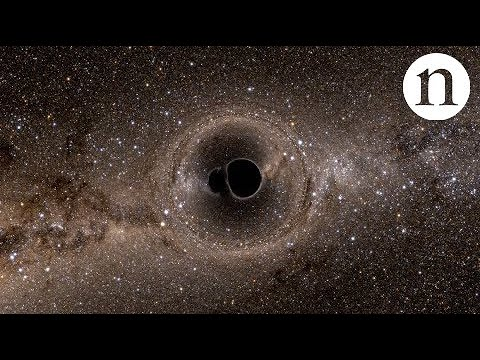

In [ ]:
import IPython.display
IPython.display.YouTubeVideo('hhbMpe17fzA', width=800, height=500)

In [ ]:
!pip install -q nnAudio
!pip install -q --upgrade wandb
!pip install -q grad-cam
!pip install -q ttach

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.3.0 requires wandb<0.11.0,>=0.10.0, but you have wandb 0.16.6 which is incompatible.


# Data Loading

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('../input/g2net-gravitational-wave-detection/training_labels.csv')
test = pd.read_csv('../input/g2net-gravitational-wave-detection/sample_submission.csv')

def get_train_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/train/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

def get_test_file_path(image_id):
    return "../input/g2net-gravitational-wave-detection/test/{}/{}/{}/{}.npy".format(
        image_id[0], image_id[1], image_id[2], image_id)

train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)

display(train.head())
display(test.head())

# Quick EDA

In [ ]:
import torch
from nnAudio.Spectrogram import CQT1992v2

def apply_qtransform(waves, transform=CQT1992v2(sr=2048, fmin=20, fmax=1024, hop_length=64)):
    waves = np.hstack(waves)
    waves = waves / np.max(waves)
    waves = torch.from_numpy(waves).float()
    image = transform(waves)
    return image

for i in range(5):
    waves = np.load(train.loc[i, 'file_path'])
    image = apply_qtransform(waves)
    target = train.loc[i, 'target']
    plt.imshow(image[0])
    plt.title(f"target: {target}")
    plt.show()

In [ ]:
train['target'].hist()

# Directory settings

In [ ]:
# ====================================================
# Directory settings
# ====================================================
import os

OUTPUT_DIR = './'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# CFG

In [ ]:
# ====================================================
# CFG
# ====================================================
class CFG:
    apex=False
    debug=False
    print_freq=100
    num_workers=4
    model_name='tf_efficientnet_b7_ns'
    scheduler='CosineAnnealingLR' # ['ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=3
    #factor=0.2 # ReduceLROnPlateau
    #patience=4 # ReduceLROnPlateau
    #eps=1e-6 # ReduceLROnPlateau
    T_max=3 # CosineAnnealingLR
    #T_0=3 # CosineAnnealingWarmRestarts
    lr=1e-4
    min_lr=1e-6
    batch_size=48
    weight_decay=1e-6
    gradient_accumulation_steps=1
    max_grad_norm=1000
    qtransform_params={"sr": 2048, "fmin": 20, "fmax": 1024, "hop_length": 32, "bins_per_octave": 8}
    seed=42
    target_size=1
    target_col='target'
    n_fold=5
    trn_fold=[0] # [0, 1, 2, 3, 4]
    train=True
    grad_cam=True

if CFG.debug:
    CFG.epochs = 1
    train = train.sample(n=10000, random_state=CFG.seed).reset_index(drop=True)

# Library

In [ ]:
# ====================================================
# Library
# ====================================================
import sys
sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

import os
import math
import time
import random
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM

import timm

from torch.cuda.amp import autocast, GradScaler

import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
wandb_api = user_secrets.get_secret("wandb_api")

In [ ]:
import wandb
wandb.login(key=wandb_api)

def class2dict(f):
    return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

run = wandb.init(project="G2Net-Public-experiments",
                 name="exp1",
                 config=class2dict(CFG),
                 group=CFG.model_name,
                 job_type="train")

# Utils

In [ ]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    score = roc_auc_score(y_true, y_pred)
    return score


def init_logger(log_file=OUTPUT_DIR+'train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()


def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(seed=CFG.seed)

# CV split

In [ ]:
Fold = StratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
for n, (train_index, val_index) in enumerate(Fold.split(train, train[CFG.target_col])):
    train.loc[val_index, 'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
display(train.groupby(['fold', 'target']).size())

# Dataset

In [ ]:
# ====================================================
# Dataset
# ====================================================
class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['file_path'].values
        self.labels = df[CFG.target_col].values
        self.wave_transform = CQT1992v2(**CFG.qtransform_params)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def apply_qtransform(self, waves, transform):
        waves = np.hstack(waves)
        waves = waves / np.max(waves)
        waves = torch.from_numpy(waves).float()
        image = transform(waves)
        return image

    def __getitem__(self, idx):
        file_path = self.file_names[idx]
        waves = np.load(file_path)
        image = self.apply_qtransform(waves, self.wave_transform)
        image = image.squeeze().numpy()
        if self.transform:
            image = self.transform(image=image)['image']
        label = torch.tensor(self.labels[idx]).float()
        return image, label

In [ ]:
class GradCAMDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.image_ids = df['id'].values
        self.file_names = df['file_path'].values
        self.labels = df[CFG.target_col].values
        self.wave_transform = CQT1992v2(**CFG.qtransform_params)
        self.transform = get_transforms(data='valid')

    def __len__(self):
        return len(self.df)

    def apply_qtransform(self, waves, transform):
        waves = np.hstack(waves)
        waves = waves / np.max(waves)
        waves = torch.from_numpy(waves).float()
        image = transform(waves)
        return image

    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        file_path = self.file_names[idx]
        waves = np.load(file_path)
        image = self.apply_qtransform(waves, self.wave_transform)
        image = image.squeeze().numpy()
        vis_image = image.copy()
        if self.transform:
            image = self.transform(image=image)['image']
        label = torch.tensor(self.labels[idx]).float()
        return image_id, image, vis_image, label

# Transforms

In [ ]:
# ====================================================
# Transforms
# ====================================================
def get_transforms(*, data):

    if data == 'train':
        return A.Compose([
            ToTensorV2(),
        ])

    elif data == 'valid':
        return A.Compose([
            ToTensorV2(),
        ])

In [ ]:
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))

for i in range(5):
    plt.figure(figsize=(16,12))
    image, label = train_dataset[i]
    plt.imshow(image[0])
    plt.title(f'label: {label}')
    plt.show()

# MODEL

In [ ]:
# ====================================================
# MODEL
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, cfg, pretrained=False):
        super().__init__()
        self.cfg = cfg
        self.model = timm.create_model(self.cfg.model_name, pretrained=pretrained, in_chans=1)
        self.n_features = self.model.classifier.in_features
        self.model.classifier = nn.Linear(self.n_features, self.cfg.target_size)

    def forward(self, x):
        output = self.model(x)
        return output

# Helper functions

In [ ]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device):
    if CFG.apex:
        scaler = GradScaler()
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        if CFG.apex:
            with autocast():
                y_preds = model(images)
                loss = criterion(y_preds.view(-1), labels)
        else:
            y_preds = model(images)
            loss = criterion(y_preds.view(-1), labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        if CFG.apex:
            scaler.scale(loss).backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            if CFG.apex:
                scaler.step(optimizer)
                scaler.update()
            else:
                optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.6f}  '
                  .format(epoch+1, step, len(train_loader),
                          remain=timeSince(start, float(step+1)/len(train_loader)),
                          loss=losses,
                          grad_norm=grad_norm,
                          lr=scheduler.get_lr()[0]))
        wandb.log({f"[fold{fold}] loss": losses.val,
                   f"[fold{fold}] lr": scheduler.get_lr()[0]})
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = criterion(y_preds.view(-1), labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(step, len(valid_loader),
                          loss=losses,
                          remain=timeSince(start, float(step+1)/len(valid_loader))))
    predictions = np.concatenate(preds)
    return losses.avg, predictions

In [ ]:
def get_grad_cam(model, device, x_tensor, img, label, plot=False):

    result = {"vis": None, "img": None, "prob": None, "label": None}

    # model prob
    with torch.no_grad():
        prob = model(x_tensor.unsqueeze(0).to(device))
    prob = np.concatenate(prob.sigmoid().to('cpu').numpy())[0]

    # grad-cam
    target_layer = model.model.conv_head
    cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)
    output = cam(input_tensor=x_tensor.unsqueeze(0))
    try:
        vis = show_cam_on_image(x_tensor.numpy().transpose((1, 2, 0)), output[0])
    except:
        return result

    # plot result
    if plot:
        fig, axes = plt.subplots(figsize=(16, 12), ncols=2)
        axes[0].imshow(vis)
        axes[0].set_title(f"prob={prob:.4f}")
        axes[1].imshow(img)
        axes[1].set_title(f"target={label}")
        plt.show()

    result = {"vis": vis, "img": img, "prob": prob, "label": label}

    return result

# Train loop

In [ ]:
# ====================================================
# Train loop
# ====================================================
def train_loop(folds, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)
    valid_labels = valid_folds[CFG.target_col].values

    train_dataset = TrainDataset(train_folds, transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, transform=get_transforms(data='train'))

    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=True,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset,
                              batch_size=CFG.batch_size * 2,
                              shuffle=False,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)

    # ====================================================
    # scheduler
    # ====================================================
    def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, pretrained=True)
    model.to(device)

    optimizer = Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler = get_scheduler(optimizer)

    # ====================================================
    # loop
    # ====================================================
    criterion = nn.BCEWithLogitsLoss()

    best_score = 0.
    best_loss = np.inf

    for epoch in range(CFG.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)

        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')
        wandb.log({f"[fold{fold}] epoch": epoch+1,
                   f"[fold{fold}] avg_train_loss": avg_loss,
                   f"[fold{fold}] avg_val_loss": avg_val_loss,
                   f"[fold{fold}] score": score})

        if score > best_score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            LOGGER.info(f'Epoch {epoch+1} - Save Best Loss: {best_loss:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'preds': preds},
                        OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth')

    valid_folds['preds'] = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth',
                                      map_location=torch.device('cpu'))['preds']

    return valid_folds

In [ ]:
# ====================================================
# main
# ====================================================
def main():

    """
    Prepare: 1.train
    """

    def get_result(result_df):
        preds = result_df['preds'].values
        labels = result_df[CFG.target_col].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}')

    if CFG.train:
        # train
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(train, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)

    if CFG.grad_cam:
        N = 5
        wandb_table = wandb.Table(columns=["id", "target", "prob", "image", "grad_cam_image"])
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                # load model
                model = CustomModel(CFG, pretrained=False)
                state = torch.load(OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_loss.pth',
                                   map_location=torch.device('cpu'))['model']
                model.load_state_dict(state)
                model.to(device)
                model.eval()
                # load oof
                oof = pd.read_csv(OUTPUT_DIR+'oof_df.csv')
                oof = oof[oof['fold'] == fold].reset_index(drop=True)
                # grad-cam (oof ascending=False)
                count = 0
                oof = oof.sort_values('preds', ascending=False)
                valid_dataset = GradCAMDataset(oof)
                for i in range(len(valid_dataset)):
                    image_id, x_tensor, img, label = valid_dataset[i]
                    result = get_grad_cam(model, device, x_tensor, img, label, plot=True)
                    if result["vis"] is not None:
                        count += 1
                        wandb_table.add_data(image_id,
                                             result["label"],
                                             result["prob"],
                                             wandb.Image(result["img"]),
                                             wandb.Image(result["vis"]))
                    if count >= N:
                        break
                # grad-cam (oof ascending=True)
                count = 0
                oof = oof.sort_values('preds', ascending=True)
                valid_dataset = GradCAMDataset(oof)
                for i in range(len(valid_dataset)):
                    image_id, x_tensor, img, label = valid_dataset[i]
                    result = get_grad_cam(model, device, x_tensor, img, label, plot=True)
                    if result["vis"] is not None:
                        count += 1
                        wandb_table.add_data(image_id,
                                             result["label"],
                                             result["prob"],
                                             wandb.Image(result["img"]),
                                             wandb.Image(result["vis"]))
                    if count >= N:
                        break
        wandb.log({'grad_cam': wandb_table})

    wandb.finish()

In [ ]:
if __name__ == '__main__':
    main()